In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Linear Regression Interactions and Polynomial Terms

Modify code to consider both interaction and polynomial terms (up to second order) for the Advertising Cost dataset. Are any of the interaction or second order terms significant?

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Text(0, 0.5, 'Sales')

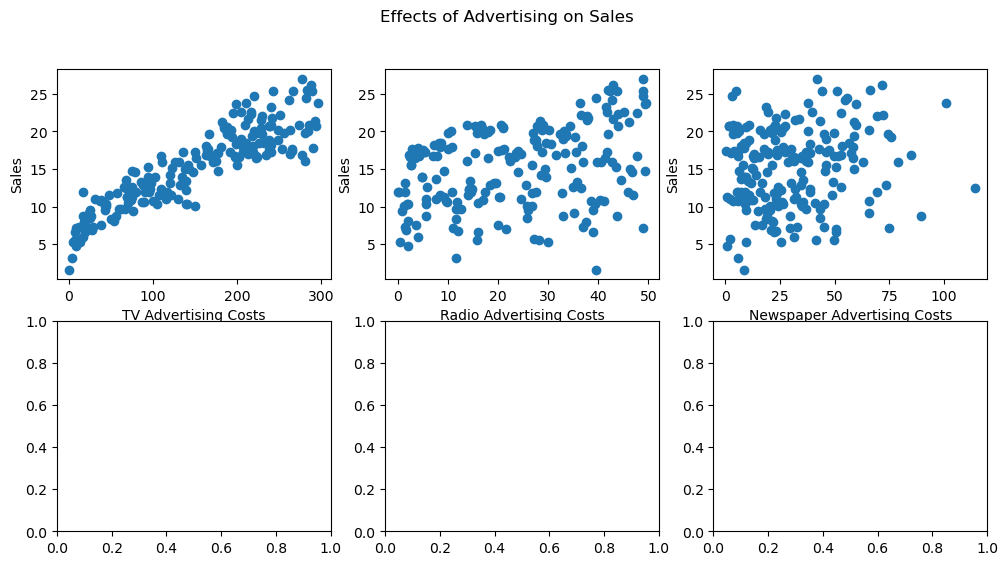

In [9]:
# Get the data
advert = pd.read_csv('advertising.csv')
print(advert.head())

# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(2, 3, figsize=(12,6))
fig.suptitle("Effects of Advertising on Sales")
ax[0][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('TV Advertising Costs')
ax[0][0].set_ylabel('Sales')

ax[0][1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Radio Advertising Costs')
ax[0][1].set_ylabel('Sales')

ax[0][2].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][2].set_xlabel('Newspaper Advertising Costs')
ax[0][2].set_ylabel('Sales')

      TV  Radio  Newspaper  Sales   Sales_TV  Sales_TV_Residual
0  230.1   37.8       69.2   22.1  19.737265           2.362735
1   44.5   39.3       45.1   10.4   9.443004           0.956996
2   17.2   45.9       69.3   12.0   7.928816           4.071184
3  151.5   41.3       58.5   16.5  15.377734           1.122266
4  180.8   10.8       58.4   17.9  17.002852           0.897148
      TV  Radio  Newspaper  Sales   Sales_TV  Sales_TV_Residual  \
0  230.1   37.8       69.2   22.1  19.737265           2.362735   
1   44.5   39.3       45.1   10.4   9.443004           0.956996   
2   17.2   45.9       69.3   12.0   7.928816           4.071184   
3  151.5   41.3       58.5   16.5  15.377734           1.122266   
4  180.8   10.8       58.4   17.9  17.002852           0.897148   

   Sales_TV_Radio  Sales_TV_Radio_Residual  
0        1.553210                 0.809525  
1        1.713489                -0.756492  
2        2.418716                 1.652469  
3        1.927194                

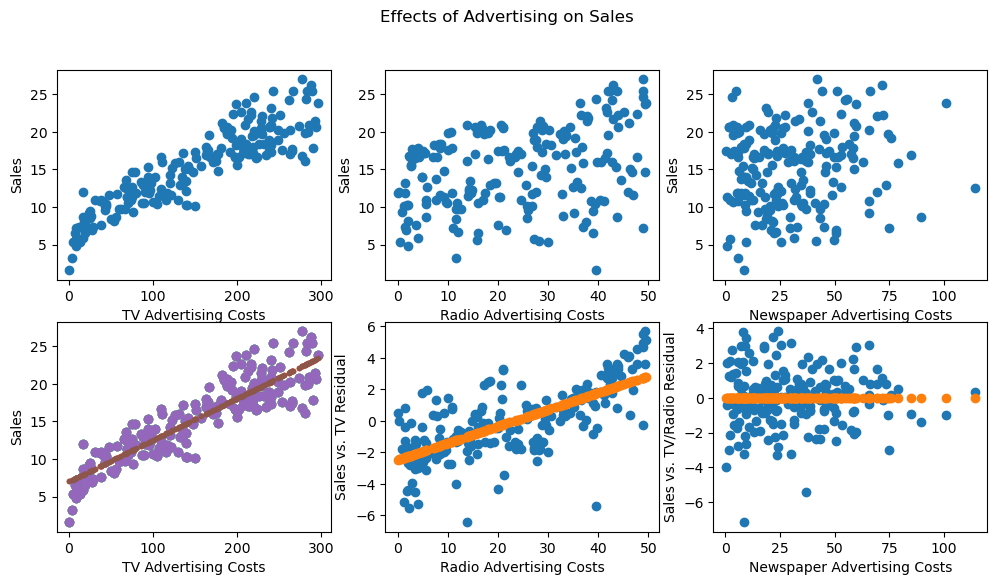

In [12]:
# Fit a linear regression model to a single parameter - Sales vs. TV advertising costs
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_TV'] = sales_pred
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
advert['Sales_TV_Residual'] = advert['Sales'] - sales_pred
print(advert.head())

# Plot regression against actual data
ax[1][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].plot(advert['TV'], sales_pred, '.', linewidth=2, label = "Prediction")   # regression line
ax[1][0].set_xlabel('TV Advertising Costs')
ax[1][0].set_ylabel('Sales')


# Fit a linear regression model to a single parameter - Sales_TV_Residual vs. Radio advertising costs
model2 = smf.ols('Sales_TV_Residual ~ Radio', data=advert)
model2 = model2.fit()
sales_pred2 = model2.predict()
advert['Sales_TV_Radio'] = sales_pred2
advert['Sales_TV_Radio_Residual'] = advert['Sales_TV_Residual'] - sales_pred2
print(advert.head())

ax[1][1].plot(advert['Radio'], advert['Sales_TV_Residual'], 'o', label = "Data")  # scatter plot showing actual data
ax[1][1].plot(advert['Radio'], sales_pred2, 'o', label = "Data")  # scatter plot showing actual data
ax[1][1].set_xlabel('Radio Advertising Costs')
ax[1][1].set_ylabel('Sales vs. TV Residual')


# Fit a linear regression model to a single parameter - Sales_TV_Radio_Residual vs. Newspaper advertising costs
model3 = smf.ols('Sales_TV_Radio_Residual ~ Newspaper', data=advert)
model3 = model3.fit()
sales_pred3 = model3.predict()
advert['Sales_TV_Radio_Newspaper'] = sales_pred3
advert['Sales_TV_Radio_Newspaper_Residual'] = advert['Sales_TV_Radio_Residual'] - sales_pred3
print(advert.head())

ax[1][2].plot(advert['Newspaper'], advert['Sales_TV_Radio_Residual'], 'o', label = "Data")  # scatter plot showing actual data
ax[1][2].plot(advert['Newspaper'], sales_pred3, 'o', label = "Data")  # scatter plot showing actual data
ax[1][2].set_xlabel('Newspaper Advertising Costs')
ax[1][2].set_ylabel('Sales vs. TV/Radio Residual')

print(model.summary())
print(model2.summary())
print(model3.summary())

fig